# Imports

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.losses import MeanAbsoluteError
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
data = pd.read_csv('nigeria_houses_data.csv')

# Data Cleaning and Preprocessing

In [3]:
#Displaying summary statistics of the dataset
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [4]:
# Checking for missing values in the dataset using isnull() and sum()

data.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [5]:
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [6]:
# Converting specific columns to the 'int64' data type

data[['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']] = data[['bedrooms', 'bathrooms', 'toilets', 
                                                                             'parking_space', 'price']].astype('int64')

In [7]:
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000


In [8]:
# Retrieve the unique values in the 'title' column of the DataFrame

data.title.unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [9]:
# Retrieve the unique values in the 'title' column of the DataFrame

data.town.unique().size

189

In [10]:
data.shape

(24326, 8)

In [11]:
#Extracting Lagos dataset
df = data[(data['state'] =='Lagos')]

#creating a list of the categorical features
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [12]:
cat_cols

['title', 'town', 'state']

In [13]:
#use onehotencoding to preprocess and encode the cat features
df_1= pd.get_dummies(df, columns = cat_cols)

In [14]:
df_1.shape

(18445, 61)

In [15]:
df_1.head()

,bedrooms,bathrooms,toilets,parking_space,price,title_Block of Flats,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,...,town_Ojodu,town_Ojota,town_Oke-Odo,town_Orile,town_Oshodi,town_Shomolu,town_Surulere,town_Victoria Island (VI),town_Yaba,state_Lagos
2,4,5,5,4,120000000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,4,5,6,40000000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,4,4,5,2,75000000,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
5,5,5,6,1,450000000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
6,4,5,5,4,65000000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [16]:
#Defining the features and target variables

target = df_1.price
features = df_1.drop(['price', 'state_Lagos'], axis=1)
features.shape

(18445, 59)

In [17]:
# Splittng the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [18]:
#creating the validation sets

X_val = X_train.sample(frac=0.2, random_state=0)
y_val = y_train.sample(frac=0.2, random_state=0)

In [19]:

# Create a StandardScaler for the input features (X)
scaler_X = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler_X.fit_transform(X_train)

# Transform the testing and validation sets using the same scaler
X_test_scaled = scaler_X.transform(X_test)
X_val_scaled = scaler_X.transform(X_val)

# Creating a StandardScaler for the target variable
scaler_y = StandardScaler()
# Fit and transform the training set target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Transform the testing and validation sets target variable using the same scaler
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Visualization

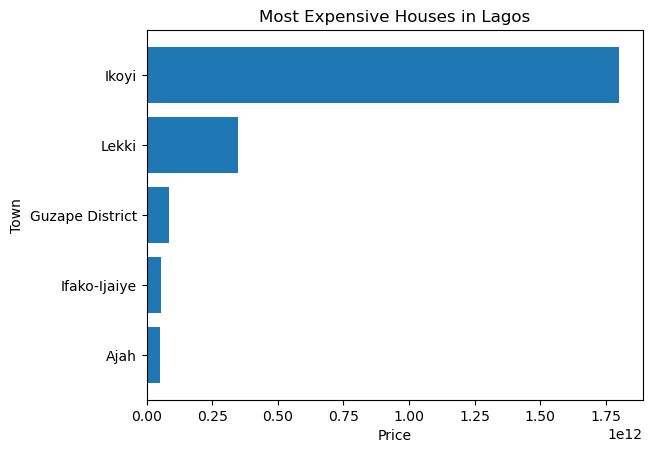

In [20]:
# Sorting the data by 'price' in descending order and select the top 10
data_sorted = data.sort_values(by='price', ascending=False).head(10)

# Extracting 'town' and 'price' columns
town= data_sorted['town']
price = data_sorted['price']

# Creating a horizontal bar chart showing the most expensive houses in lagos and their locations
plt.barh(town, price)
plt.xlabel('Price')
plt.ylabel('Town')
plt.title('Most Expensive Houses in Lagos')
plt.gca().invert_yaxis()
plt.show()

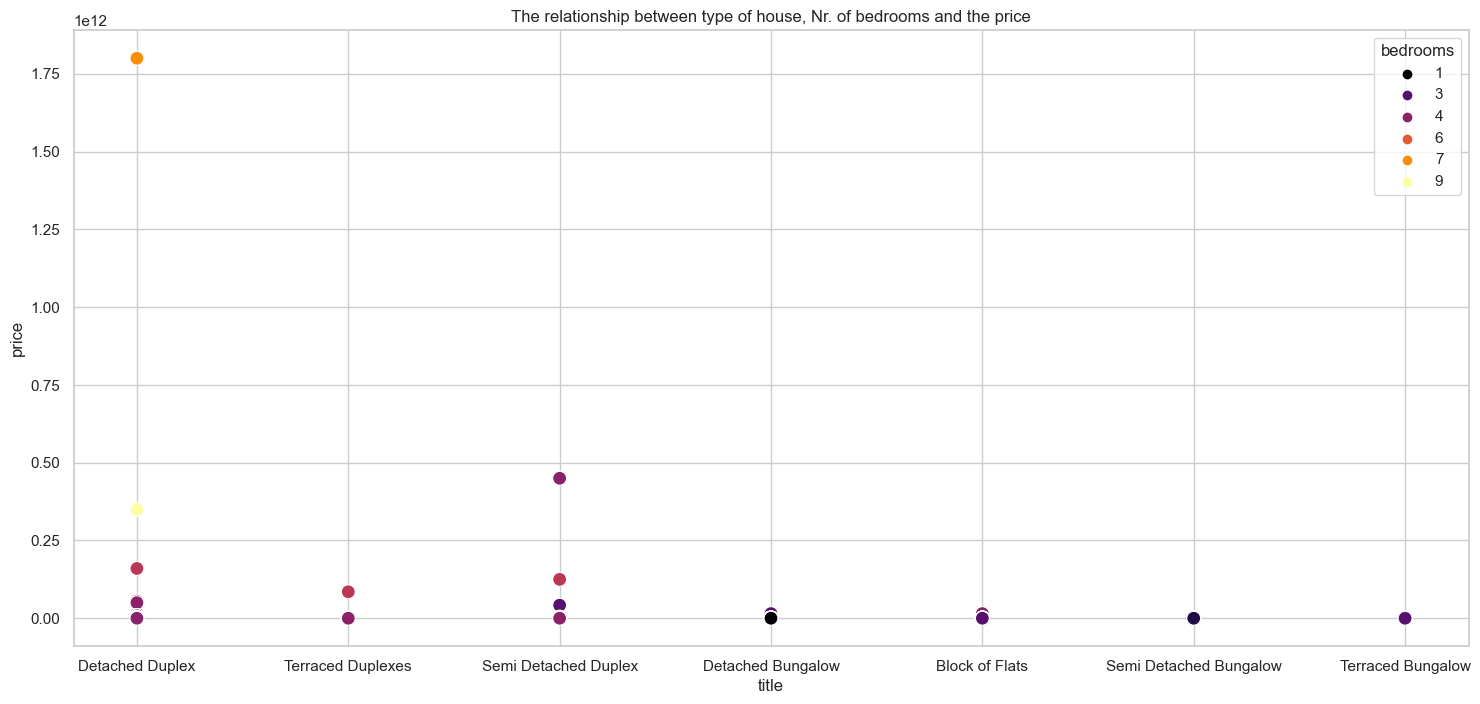

In [21]:
# Setting Seaborn style to whitegrid
sns.set(style='whitegrid')

# Creating a scatter plot using Seaborn
plt.figure(figsize=(18, 8))
sns.scatterplot(x= 'title', y ='price', hue='bedrooms', data =data, palette='inferno', s=100)
plt.title('The relationship between type of house, Nr. of bedrooms and the price')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8728\2290337363.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= 'bedrooms', y ='price', data =data, palette='inferno', s=100)
C:\Users\user\AppData\Local\Temp\ipykernel_8728\2290337363.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= 'bathrooms', y ='price', data =data, palette='inferno', s=100)


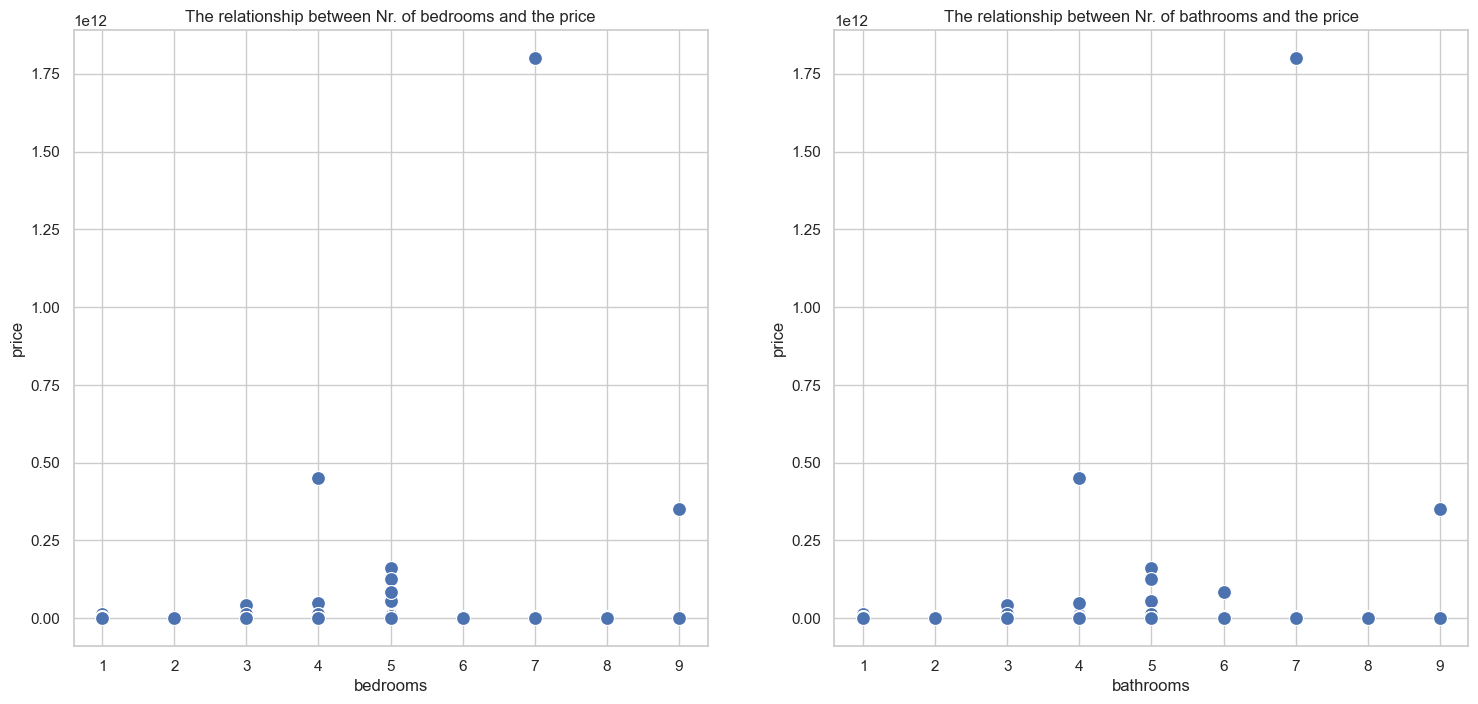

In [22]:
sns.set(style='whitegrid')
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x= 'bedrooms', y ='price', data =data, palette='inferno', s=100)
plt.title('The relationship between Nr. of bedrooms and the price')

plt.subplot(1, 2, 2)
sns.scatterplot(x= 'bathrooms', y ='price', data =data, palette='inferno', s=100)
plt.title('The relationship between Nr. of bathrooms and the price')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8728\667205350.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= 'toilets', y ='price', data =data, palette='inferno', s=100)
C:\Users\user\AppData\Local\Temp\ipykernel_8728\667205350.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= 'parking_space', y ='price', data =data, palette='inferno', s=100)


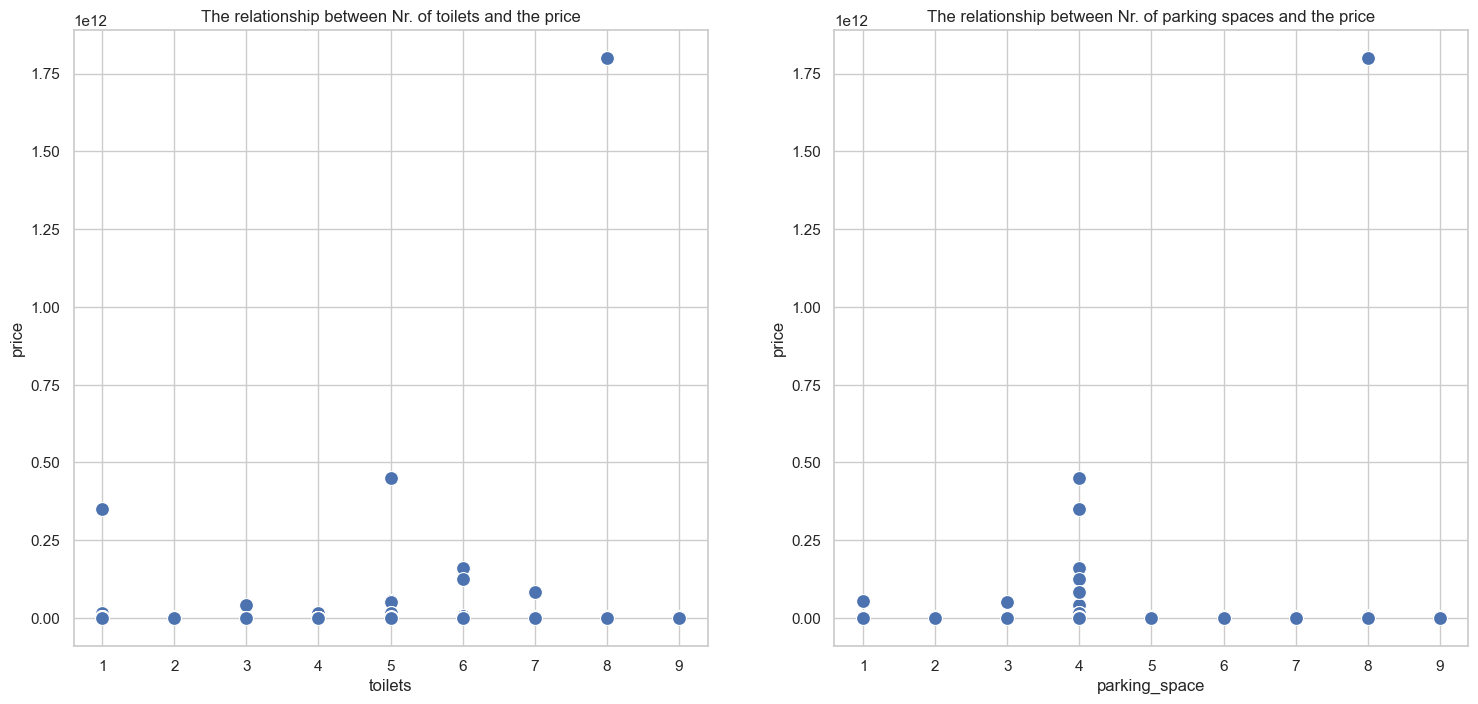

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x= 'toilets', y ='price', data =data, palette='inferno', s=100)
plt.title('The relationship between Nr. of toilets and the price')

plt.subplot(1, 2, 2)
sns.scatterplot(x= 'parking_space', y ='price', data =data, palette='inferno', s=100)
plt.title('The relationship between Nr. of parking spaces and the price')
plt.show()

# Summary of the Visualization

Looking at the plots the price of houses in Lagos state doesn't seem to be affected by the number of bedrooms, bathrooms, toilets, or parking spaces, but mostly by the location.

# Training Model 1

In [24]:
#Defining the model
model = Sequential([
    Dense(units= 128, input_shape= (X_train_scaled.shape[1],), activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(1, activation='linear')
])

In [25]:
#Compiling the model
optimizer= Adam(learning_rate= 0.001)
model.compile(optimizer=optimizer, loss=MeanAbsoluteError())

In [26]:
#fitting/training the model
model_history = model.fit(X_train_scaled, y_train_scaled, batch_size=56, epochs=250, 
                          verbose=0, validation_data=(X_val_scaled, y_val_scaled))

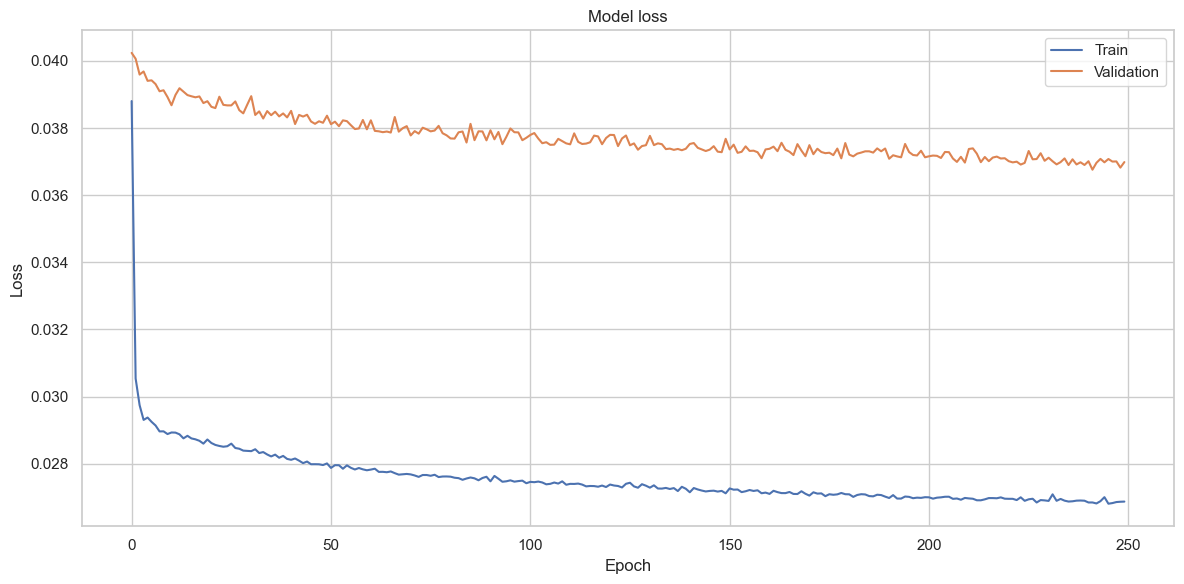

In [27]:
#Visualizing the training and validation losses

model_history_df = pd.DataFrame(model_history.history)


plt.figure(figsize=(12, 6))

# Plot training & validation loss values

plt.plot(model_history_df['loss'], label='Train')
plt.plot(model_history_df['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
#making predictions with the model
y_pred = model.predict(X_test_scaled)

116/116 [==============================] - 0s 2ms/step


In [29]:
#unscaling the predicted values
y_pred_unscaled = scaler_y.inverse_transform(y_pred).flatten()

In [30]:
y_pred_unscaled.astype('int64')

array([134156912, 134156912,  66800184, ..., 134156912,  85078888,
        62124392], dtype=int64)

In [31]:
y_test[0:3]

2960    180000000
9430    125000000
8387     55000000
Name: price, dtype: int64

# Model Evaluation

In [32]:
#calculating the coefficient of determination using r2_score
eval_r2 = r2_score(y_test, y_pred_unscaled)
eval_r2

0.0007771029676401087

# Model 2

In [33]:
X = df.drop(['price', 'state'], axis = 1)
y = df['price']

In [34]:
#creating the training and testing sets

X_train_2, X_test_all, y_train_2, y_test_all = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating the validation sets

X_test_2, X_val_2, y_test_2, y_val_2 = train_test_split(X_test_all, y_test_all, test_size=0.5, random_state=42)

In [41]:

# print(X.dtypes)
X_train_2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town
11228,5,5,6,4,Detached Duplex,Ikeja
2260,5,5,5,4,Terraced Duplexes,Lekki
1965,1,1,1,4,Detached Duplex,Lekki
22213,6,6,7,4,Detached Duplex,Isheri North
18636,5,6,7,6,Detached Duplex,Lekki


In [36]:
#creating the nunerical and categorical features

num_features = X.select_dtypes(include=['int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [37]:
#Defining the preprocessing steps

numerical_transformer = StandardScaler(with_mean=False)

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler(with_mean=False))
])

In [38]:
#Creating the preprocessor, combining the transformation steps for numerical and cat features

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [42]:
#defining the model using a pipepline and randomforest regressor

model_2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=250,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42))
])

In [43]:
#fitting the model

model_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  StandardScaler(with_mean=False),
                                                  Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['title', 'town'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(n_estimators=250, random_state=42))])

In [71]:
#scaling the target feature
scale_y_val = StandardScaler(with_mean=False)
y_val_scl = scale_y_val.fit_transform(y_val_2.values.reshape(-1, 1)).ravel()



In [121]:
def predict_prices(inputs):
    result = model_2.predict(inputs)
    return scale_y_val.inverse_transform(result.reshape(-1, 1))

#making predictions
model_2_preds = predict_prices(X_val_2)
model_2_preds

array([[5.77211574e+16],
       [8.97025776e+16],
       [1.23943044e+17],
       ...,
       [9.51164673e+16],
       [1.05650510e+17],
       [4.43725590e+17]])

In [136]:
# import numpy as np
# import pandas as pd

# # Sample input data as a NumPy array
# input_data = np.array([3, 3, 4, 4, 'Block of Flats', 'Lekki']).reshape(1, -1)

# # Assuming column names for your features
# columns = ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town']

# # Create a Pandas DataFrame with the input data and columns
# input_df = pd.DataFrame(input_data, columns=columns)

# # Assuming you have a preprocessor named 'preprocessor' and a model named 'model_2'
# # preprocessed_input = preprocessor.transform(input_df)
# prediction = model_2.predict(input_df)

# print("Model Prediction:", int(prediction))


int(model_2_preds[0])
    
int(model_2.predict(X_val_2[0:1]))
# for i in y_val_2 == int(model_2.predict(X_val_2[0:1])):
#     if i:
#         print(i)


106701294

# Evaluating Model 2

In [122]:
#calculating the mean squared erro

mse_val =mean_squared_error(y_val_scl, model_2_preds)

In [124]:
mse_val

3.5432994666715364e+37

In [138]:
def predict_prices(inputs):
    input_data = np.array(inputs).reshape(1, -1)
    columns = ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town']
    input_df = pd.DataFrame(input_data, columns=columns)
    result = model_2.predict(input_df)
    return int(result)

#making predictions
model_2_preds = predict_prices([3, 3, 4, 4, 'Block of Flats', 'Lekki'])
model_2_preds

106701294

In [139]:
import pickle
pickle.dump(model_2, open('model.pkl', 'wb'))